In [6]:
!pip install prophet statsmodels scikit-optimize gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 104.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/1

In [2]:
# Import  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit, train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import glob
import os
from google.colab import drive
import holidays  # Make sure you have this library installed

# --------------------------------------------
# Load and preprocess data
# Mount Google Drive
drive.mount('/content/drive')

# Adjust path to  Data folder in Google Drive
path = "/content/drive/MyDrive/Colab Notebooks/Data1"  # Modify this path as needed

# Print contents of the directory to verify
print("Contents of the directory:")
print(os.listdir(path))

# all CSV files
all_files = glob.glob(os.path.join(path, "*.csv"))

print(f"Number of CSV files found: {len(all_files)}")

# Read and concatenate all CSV with error handling
df_list = []
for file in all_files:
    print(f"Reading file: {file}")
    try:
        df = pd.read_csv(file, low_memory=False)  # Using low_memory=False to avoid DtypeWarning
        df_list.append(df)
    except Exception as e:
        print(f"Error reading {file}: {str(e)}")

# Check if dataframes were loaded
if len(df_list) > 0:
    # Combine all dataframes into one
    df = pd.concat(df_list, ignore_index=True)
    print(f"Combined DataFrame shape: {df.shape}")
else:
    print("No CSV files were successfully read.")
    raise ValueError("No data to process. Please check your file path and CSV files.")

# Displaying first few rows of combined DataFrame
print(df.head())

Mounted at /content/drive
Contents of the directory:
['isp_arrest_data_2015_q1.csv', 'isp_arrest_data_2015_q2.csv', 'isp_arrest_data_2015_q3.csv', 'isp_arrest_data_2015_q4.csv', 'isp_arrest_data_2016_q1.csv', 'isp_arrest_data_2016_q2.csv', 'isp_arrest_data_2016_q3.csv', 'isp_arrest_data_2016_q4.csv', 'isp_arrest_data_2017_q1.csv', 'isp_arrest_data_2017_q2.csv', 'isp_arrest_data_2017_q3.csv', 'isp_arrest_data_2017_q4.csv', 'isp_arrest_data_2018_q1.csv', 'isp_arrest_data_2018_q2.csv', 'isp_arrest_data_2018_q3.csv', 'isp_arrest_data_2018_q4.csv', 'isp_arrest_data_2019_q1.csv', 'isp_arrest_data_2019_q2.csv', 'isp_arrest_data_2019_q4.csv', 'isp_arrest_data_2019_q3.csv', 'isp_arrest_data_2020_q2.csv', 'isp_arrest_data_2020_q1.csv', 'isp_arrest_data_2020_q3.csv', 'isp_arrest_data_2020_q4.csv', 'isp_arrest_data_2021_q1.csv', 'isp_arrest_data_2021_q2.csv', 'isp_arrest_data_2021_q3.csv', 'isp_arrest_data_2021_q4.csv', 'isp_arrest_data_2022_q1.csv', 'isp_arrest_data_2022_q2.csv', 'isp_arrest_data

DEBUG:cmdstanpy:input tempfile: /tmp/tmp9ast_lnp/e9mjv0xn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9ast_lnp/209vca0g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18631', 'data', 'file=/tmp/tmp9ast_lnp/e9mjv0xn.json', 'init=/tmp/tmp9ast_lnp/209vca0g.json', 'output', 'file=/tmp/tmp9ast_lnp/prophet_modelvxous1jm/prophet_model-20241030160636.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:06:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:06:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


<Figure size 1200x600 with 0 Axes>

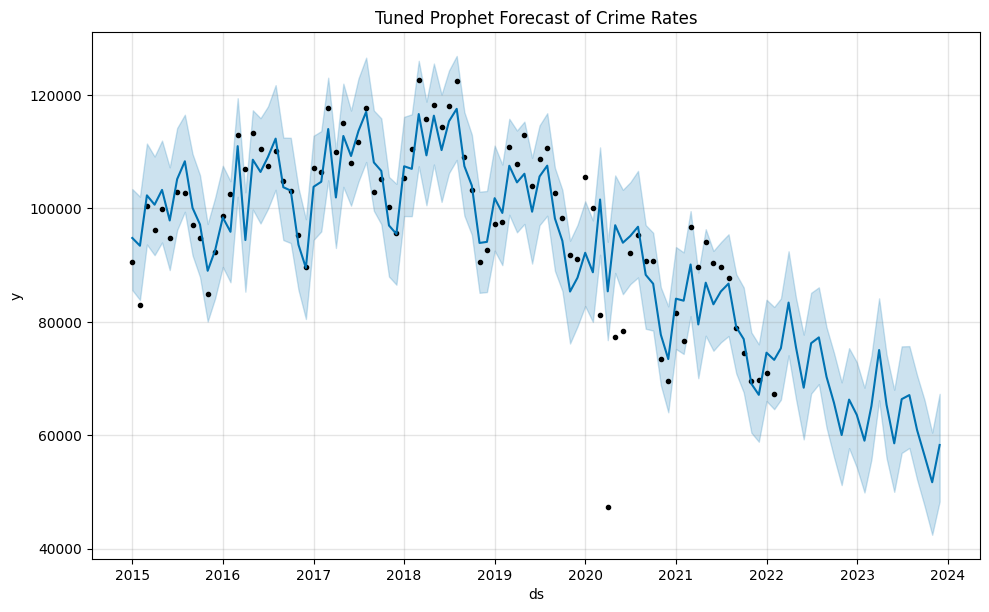

<Figure size 1200x800 with 0 Axes>

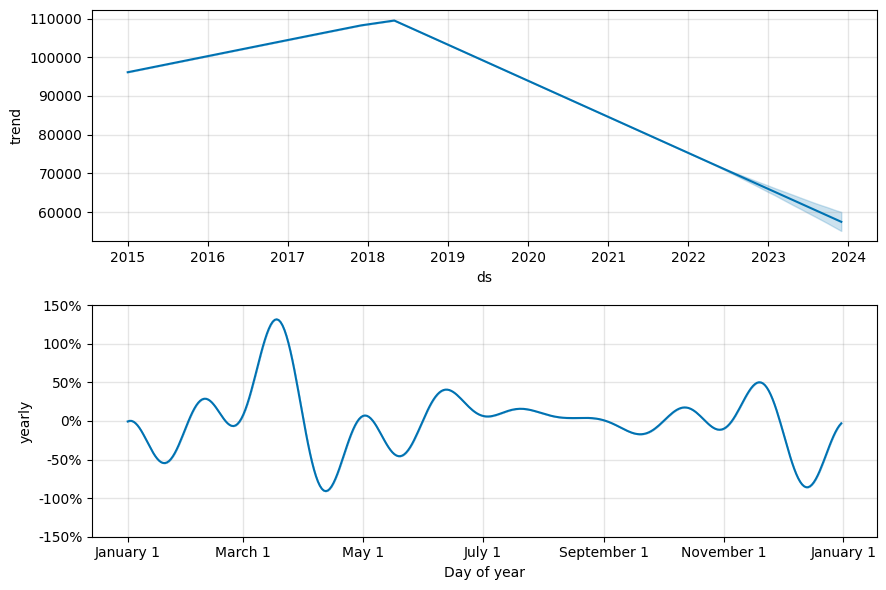

Tuned Prophet MAE: 5729.2685
Tuned Prophet RMSE: 6708.8788


In [3]:
# necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Focusing on 'ARREST_YEAR' and 'ARREST_MONTH'
important_vars = ['ARREST_YEAR', 'ARREST_MONTH']

# a new DataFrame to store the necessary data
df_crime = df[important_vars].dropna().copy()

# Creating 'DATE' for time series and 'CRIME_COUNT'
df_crime['DATE'] = pd.to_datetime(df_crime['ARREST_YEAR'].astype(str) + '-' +
                                  df_crime['ARREST_MONTH'].astype(str).str.zfill(2) + '-01')

# monthly crime counts for time series
crime_counts = df_crime.groupby('DATE').size().reset_index(name='CRIME_COUNT')

# Prophet requires 'ds' for datetime and 'y' for the target var
crime_counts = crime_counts.rename(columns={'DATE': 'ds', 'CRIME_COUNT': 'y'})

# Split data into train/test (80% train, 20% test)
train, test = train_test_split(crime_counts, test_size=0.2, shuffle=False)

# --------------------------------------------
# Prophet Model: Tuning and Forecasting
# --------------------------------------------
# Initialize Prophet with tuning parameters
m_tuned = Prophet(
    yearly_seasonality=True,   # Enables yearly seasonality
    weekly_seasonality=False,  # Disable weekly seasonality
    daily_seasonality=False,   # Disable daily seasonality
    seasonality_mode='multiplicative',  # Use multiplicative seasonality
    changepoint_prior_scale=0.05  # Controls flexibility in the trend
)

# Fitting Prophet model to training data
m_tuned.fit(train)

# Creating future dataframe to predict for the test period
future = m_tuned.make_future_dataframe(periods=len(test), freq='M')
forecast = m_tuned.predict(future)

# Plotting forecasted data
plt.figure(figsize=(12, 6))
m_tuned.plot(forecast)
plt.title('Tuned Prophet Forecast of Crime Rates')
plt.show()

# Plot the components of the forecast (trend, yearly seasonality)
plt.figure(figsize=(12, 8))
m_tuned.plot_components(forecast)
plt.show()

# --------------------------------------------
# Evaluation Metrics
# --------------------------------------------
# Evaluate performance on the test set using MAE and RMSE
y_true = test['y']
y_pred = forecast['yhat'][-len(test):]  # Predicted values for test period

# Calculating MAE and RMSE for tuned Prophet model
mae_prophet = mean_absolute_error(y_true, y_pred)
rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred))

# Print results
print(f"Tuned Prophet MAE: {mae_prophet:.4f}")
print(f"Tuned Prophet RMSE: {rmse_prophet:.4f}")


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 0.9] before, using random point [0.9233756209854476, 0.3381170377517538]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 0.9] before, using random point [0.2490751041320707, 0.6880587057121118]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 0.9] before, using random point [1.1988130423716687, 0.525450119330876]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 0.9] before, using random point [2.192277268593908, 0.8287603432227822]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective h

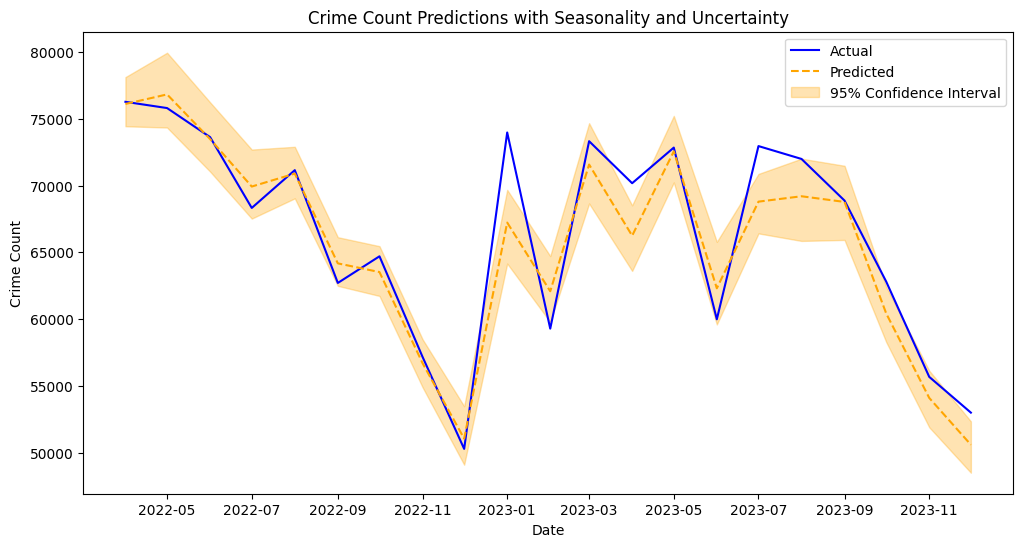

ElasticNet with Seasonality - MAE: 1825.98, RMSE: 2436.17, R²: 0.90, MAPE: 2.76%
Best ElasticNet Parameters: OrderedDict([('alpha', 0.1), ('l1_ratio', 0.9)])


In [4]:
# Import  libraries
import pandas as pd
import numpy as np
import holidays  # For holiday info
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from skopt import BayesSearchCV
from sklearn.utils import resample  # For bootstrapping
import matplotlib.pyplot as plt

#  preprocessed DataFrame
important_vars = ['ARREST_YEAR', 'ARREST_MONTH','OFFENSE_COUNTY']

# new DataFrame for focused variables and drop missing data
df_crime = df[important_vars].dropna().copy()

#  'DATE' for time series and 'CRIME_COUNT'
df_crime['DATE'] = pd.to_datetime(df_crime['ARREST_YEAR'].astype(str) + '-' +
                                  df_crime['ARREST_MONTH'].astype(str).str.zfill(2) + '-01')

# Group data by date to get monthly crime counts
crime_counts = df_crime.groupby('DATE').size().reset_index(name='CRIME_COUNT')
crime_counts = crime_counts.rename(columns={'DATE': 'ds', 'CRIME_COUNT': 'y'})

# Add day of the week
crime_counts['day_of_week'] = crime_counts['ds'].dt.dayofweek  # Monday=0, Sunday=6

# Add holiday features
us_holidays = holidays.US()  # Replace with your country's holiday if needed
crime_counts['is_holiday'] = crime_counts['ds'].isin(us_holidays).astype(int)

# Add seasonal features (sinusoidal transformation for seasonality)
crime_counts['month_sin'] = np.sin(2 * np.pi * crime_counts['ds'].dt.month / 12)
crime_counts['month_cos'] = np.cos(2 * np.pi * crime_counts['ds'].dt.month / 12)

# Create lag and rolling features
crime_counts['lag1'] = crime_counts['y'].shift(1)
crime_counts['lag2'] = crime_counts['y'].shift(2)
crime_counts['lag3'] = crime_counts['y'].shift(3)
crime_counts['rolling_mean_3'] = crime_counts['y'].rolling(window=3).mean()
crime_counts['rolling_mean_6'] = crime_counts['y'].rolling(window=6).mean()

# Incorporating recent trends using Exponentially Weighted Moving Average (EWMA)
crime_counts['ewm_12'] = crime_counts['y'].ewm(span=12).mean()

# Drop NaN values created by lagging, rolling features, and EWMA
crime_counts.dropna(inplace=True)

# Split the data into train and test sets (80% train, 20% test)
train, test = train_test_split(crime_counts, test_size=0.2, shuffle=False)

# Standardizing features
scaler = StandardScaler()

# Prepare training features
X_train_raw = pd.DataFrame({
    'year': train['ds'].dt.year,
    'month': train['ds'].dt.month,
    'day_of_week': train['day_of_week'],
    'is_holiday': train['is_holiday'],
    'month_sin': train['month_sin'],  # Adding seasonal feature
    'month_cos': train['month_cos'],  # Adding seasonal feature
    'lag1': train['lag1'],
    'lag2': train['lag2'],
    'lag3': train['lag3'],
    'rolling_mean_3': train['rolling_mean_3'],
    'rolling_mean_6': train['rolling_mean_6'],
    'ewm_12': train['ewm_12']  # EWMA feature
})

# Scaling features
X_train_scaled = scaler.fit_transform(X_train_raw)
y_train = train['y']

# Prepare test features
X_test_raw = pd.DataFrame({
    'year': test['ds'].dt.year,
    'month': test['ds'].dt.month,
    'day_of_week': test['day_of_week'],
    'is_holiday': test['is_holiday'],
    'month_sin': test['month_sin'],  # Adding seasonal feature
    'month_cos': test['month_cos'],  # Adding seasonal feature
    'lag1': test['lag1'],
    'lag2': test['lag2'],
    'lag3': test['lag3'],
    'rolling_mean_3': test['rolling_mean_3'],
    'rolling_mean_6': test['rolling_mean_6'],
    'ewm_12': test['ewm_12']  # EWMA feature
})

# Scale the test features
X_test_scaled = scaler.transform(X_test_raw)
y_test = test['y']

# Bayesian optimization for ElasticNet
param_dist_en = {
    'alpha': (0.1, 10.0, 'log-uniform'),  # Adjusted for stronger regularization
    'l1_ratio': (0.1, 0.9, 'uniform')  # ElasticNet ratio
}

# TimeSeriesSplit cross-validator (no data leakage)
tscv = TimeSeriesSplit(n_splits=10)

# Bayesian search for hyperparameter tuning
bayes_search_en = BayesSearchCV(
    ElasticNet(max_iter=10000),  # Increased iterations
    search_spaces=param_dist_en,
    scoring='neg_mean_squared_error',
    cv=tscv,
    n_iter=50,  # Increased iterations for better search
    random_state=42,
    n_jobs=-1
)

# Fit the model using the Bayesian search
bayes_search_en.fit(X_train_scaled, y_train)

# Retrieve the best ElasticNet model
best_en_model = bayes_search_en.best_estimator_

# Predict on the test set using the tuned ElasticNet model
y_pred_en = best_en_model.predict(X_test_scaled)

# Bootstrapping to estimate uncertainty
n_bootstraps = 1000
y_boot_preds = []

for i in range(n_bootstraps):
    # Bootstrap resample
    X_resampled, y_resampled = resample(X_train_scaled, y_train, random_state=i)
    best_en_model.fit(X_resampled, y_resampled)
    y_boot_preds.append(best_en_model.predict(X_test_scaled))

# Convert to DataFrame for easier analysis
y_boot_preds_df = pd.DataFrame(y_boot_preds)

# Calculate mean prediction and confidence intervals
y_pred_mean = y_boot_preds_df.mean(axis=0)
y_pred_lower = y_boot_preds_df.quantile(0.025, axis=0)
y_pred_upper = y_boot_preds_df.quantile(0.975, axis=0)

# Plot actual vs predicted with uncertainty
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], y_test, label='Actual', color='blue')
plt.plot(test['ds'], y_pred_mean, label='Predicted', color='orange', linestyle='--')
plt.fill_between(test['ds'], y_pred_lower, y_pred_upper, color='orange', alpha=0.3, label='95% Confidence Interval')
plt.title('Crime Count Predictions with Seasonality and Uncertainty')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()
plt.show()

# Fix for MAPE calculation to avoid division by zero
def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.where(y_true == 0, 1e-10, y_true)  # Replace zero values
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Evaluation: MAE, RMSE, R², and MAPE
mae_en = mean_absolute_error(y_test, y_pred_mean)  # Calculate MAE
mape_en = mean_absolute_percentage_error(y_test, y_pred_mean)  # Calculate MAPE
rmse_en = np.sqrt(mean_squared_error(y_test, y_pred_mean))  # Calculate RMSE
r2_en = r2_score(y_test, y_pred_mean)  # Calculate R²

# Print evaluation metrics
print(f"ElasticNet with Seasonality - MAE: {mae_en:.2f}, RMSE: {rmse_en:.2f}, R²: {r2_en:.2f}, MAPE: {mape_en:.2f}%")
print(f"Best ElasticNet Parameters: {bayes_search_en.best_params_}")



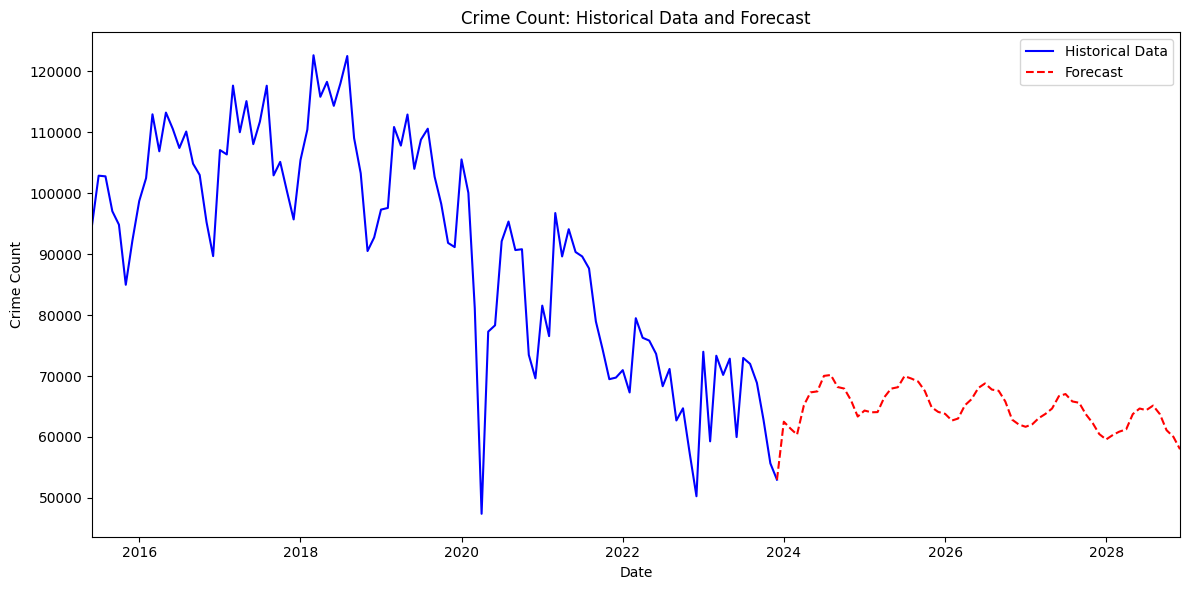

           ds      y
0  2023-12-01  52994
1  2024-01-01  62504
2  2024-02-01  61358
3  2024-03-01  60383
4  2024-04-01  65202
..        ...    ...
56 2028-08-01  65152
57 2028-09-01  63735
58 2028-10-01  61116
59 2028-11-01  60031
60 2028-12-01  57991

[61 rows x 2 columns]


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Forecast Future Crime Counts - Iterative Approach with Alignment
forecast_horizon = 60  # Generate future dates for forecasting (5 years)
last_date = crime_counts['ds'].max()  # Last date from historical data
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=forecast_horizon, freq='MS')

# Start by using the last few known values for lag calculation
last_lags = {
    'lag1': crime_counts['y'].iloc[-1],
    'lag2': crime_counts['y'].iloc[-2],
    'lag3': crime_counts['y'].iloc[-3],
    'rolling_mean_3': crime_counts['y'].rolling(window=3).mean().iloc[-1],
    'rolling_mean_6': crime_counts['y'].rolling(window=6).mean().iloc[-1],
    'ewm_12': crime_counts['y'].ewm(span=12).mean().iloc[-1]
}

# Create a list for future predictions
future_predictions = []

# Iterative forecast loop for each future date
for date in future_dates:
    # Prepare features for the current date
    features = {
        'year': date.year,
        'month': date.month,
        'day_of_week': date.dayofweek,
        'is_holiday': date in us_holidays,
        'month_sin': np.sin(2 * np.pi * date.month / 12),
        'month_cos': np.cos(2 * np.pi * date.month / 12),
        'lag1': last_lags['lag1'],
        'lag2': last_lags['lag2'],
        'lag3': last_lags['lag3'],
        'rolling_mean_3': last_lags['rolling_mean_3'],
        'rolling_mean_6': last_lags['rolling_mean_6'],
        'ewm_12': last_lags['ewm_12']
    }

    # Convert features to a DataFrame and scale them
    features_df = pd.DataFrame([features])
    features_scaled = scaler.transform(features_df)  # Scale features

    # Predict crime count for this date
    predicted_crime_count = best_en_model.predict(features_scaled)[0]

    # Round up the predicted crime count and convert to an integer
    rounded_predicted_crime_count = int(np.ceil(predicted_crime_count))

    # Append the rounded prediction to the list of future predictions
    future_predictions.append(rounded_predicted_crime_count)

    # Update lag features iteratively
    last_lags['lag3'] = last_lags['lag2']
    last_lags['lag2'] = last_lags['lag1']
    last_lags['lag1'] = rounded_predicted_crime_count
    last_lags['rolling_mean_3'] = np.mean([last_lags['lag1'], last_lags['lag2'], last_lags['lag3']])
    last_lags['rolling_mean_6'] = np.mean([last_lags['lag1'], last_lags['lag2'], last_lags['lag3'],
                                           crime_counts['y'].iloc[-4], crime_counts['y'].iloc[-5], crime_counts['y'].iloc[-6]])
    last_lags['ewm_12'] = (0.92 * rounded_predicted_crime_count) + (0.08 * last_lags['ewm_12'])  # EWM update

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({'ds': future_dates, 'y': future_predictions})

# Add the last point of historical data to the beginning of the forecast
last_historical_point = pd.DataFrame({'ds': [crime_counts['ds'].iloc[-1]], 'y': [crime_counts['y'].iloc[-1]]})
forecast_df = pd.concat([last_historical_point, forecast_df]).reset_index(drop=True)

# Plot the historical and forecasted crime counts
plt.figure(figsize=(12, 6))

# Plot historical crime data in blue
plt.plot(crime_counts['ds'], crime_counts['y'], label='Historical Data', color='blue')

# Plot forecasted crime data in red with a dashed line
plt.plot(forecast_df['ds'], forecast_df['y'], label='Forecast', color='red', linestyle='--')

# Add title and labels
plt.title('Crime Count: Historical Data and Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')

# Add legend to differentiate between historical and forecasted data
plt.legend()

# Ensure x-axis limits cover both historical and forecast data
plt.xlim(crime_counts['ds'].min(), forecast_df['ds'].max())

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# Display the forecasted crime counts
print(forecast_df)

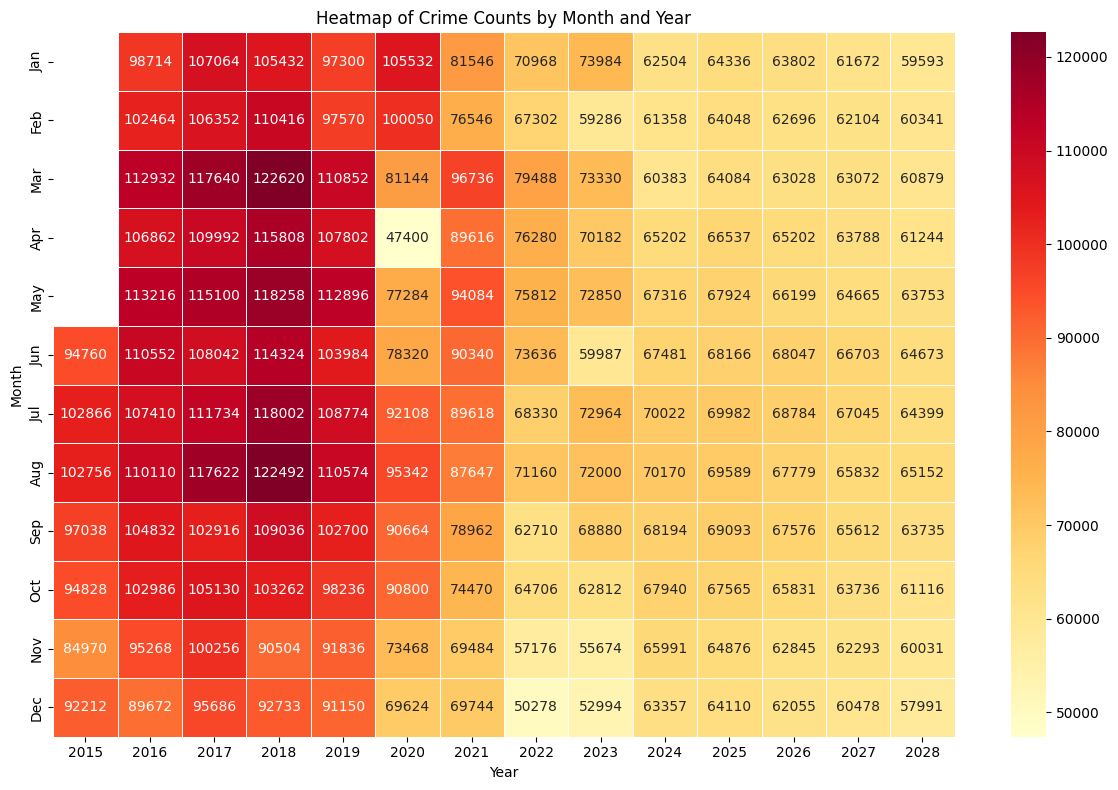

In [ ]:
import calendar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine historical crime counts with the forecasted data
combined_data = pd.concat([crime_counts[['ds', 'y']], forecast_df.iloc[1:]])

# Create a complete DataFrame for all months
full_date_range = pd.date_range(start=combined_data['ds'].min(), end=combined_data['ds'].max(), freq='MS')
full_data = pd.DataFrame({'ds': full_date_range})
full_data['Year'] = full_data['ds'].dt.year
full_data['Month'] = full_data['ds'].dt.month

# Merge to ensure all months are included
complete_data = pd.merge(full_data, combined_data[['ds', 'y']], on='ds', how='left')

# Pivot for heatmap
heatmap_data = complete_data.pivot_table(index='Month', columns='Year', values='y')

# Map month numbers to names
heatmap_data.index = heatmap_data.index.map(lambda x: calendar.month_abbr[x])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt=".0f", linewidths=.5)
plt.title('Heatmap of Crime Counts by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.tight_layout()
plt.show()


<ipython-input-15-cfbd599064b6>:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_numeric = heatmap_data.replace({'High': 2, 'Medium': 1, 'Low': 0})


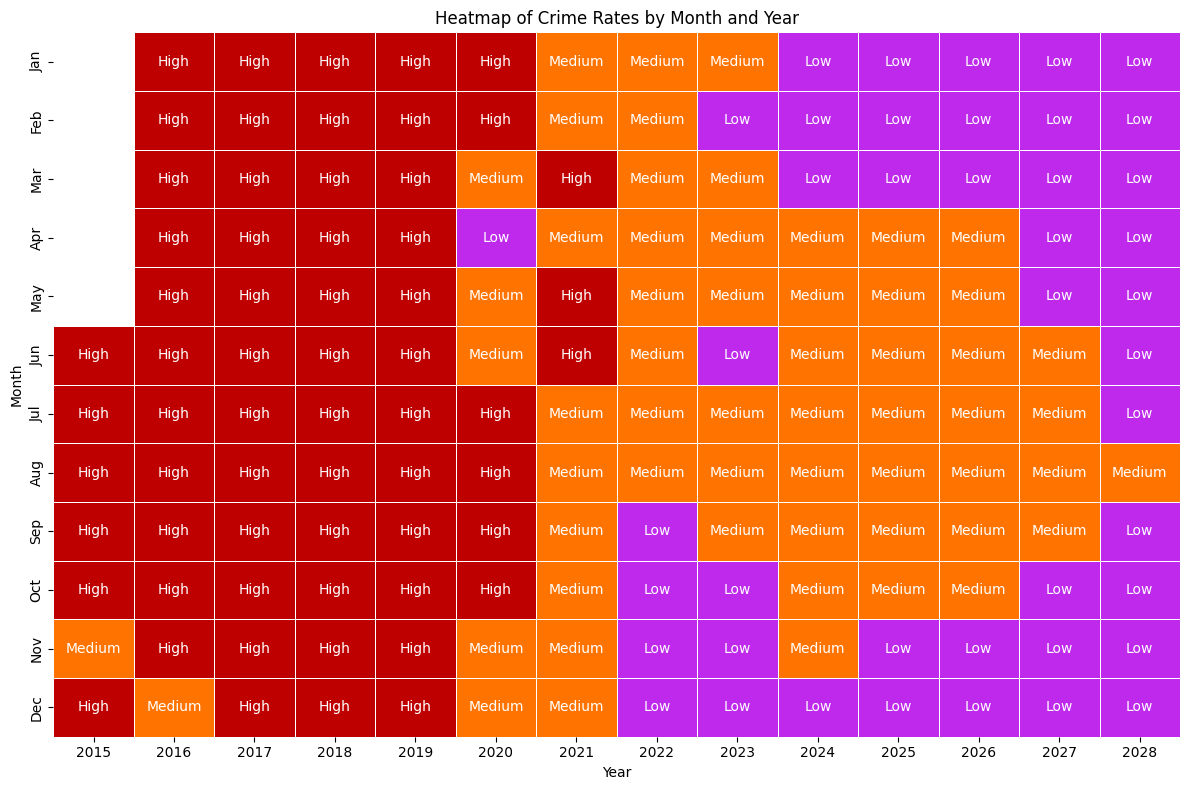

In [ ]:
import calendar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Classify crime rates
def categorize_crime_rate(crime_count):
    if crime_count > 90000:
        return 'High'
    elif 65000 <= crime_count <= 90000:
        return 'Medium'
    else:
        return 'Low'

# Apply the categorization function
combined_data['Crime Rate'] = combined_data['y'].apply(categorize_crime_rate)

# Create a complete DataFrame for all months
full_date_range = pd.date_range(start=combined_data['ds'].min(), end=combined_data['ds'].max(), freq='MS')
full_data = pd.DataFrame({'ds': full_date_range})
full_data['Year'] = full_data['ds'].dt.year
full_data['Month'] = full_data['ds'].dt.month

# Merge to ensure all months are included
complete_data = pd.merge(full_data, combined_data[['ds', 'Crime Rate']], on='ds', how='left')

# Pivot for heatmap
heatmap_data = complete_data.pivot_table(index='Month', columns='Year', values='Crime Rate', aggfunc='first')

# Map month numbers to names
heatmap_data.index = heatmap_data.index.map(lambda x: calendar.month_abbr[x])

# Create a custom colormap
cmap = {'High': '#be29ec', 'Medium': '#ff7400', 'Low': '#bf0000'}
cmap_list = [cmap.get(rate) for rate in ['High', 'Medium', 'Low']]

# Create a numerical representation of categories for the heatmap
heatmap_numeric = heatmap_data.replace({'High': 2, 'Medium': 1, 'Low': 0})

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_numeric, cmap=cmap_list, annot=heatmap_data, fmt="", linewidths=.5, cbar=False)
plt.title('Heatmap of Crime Rates by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
import numpy as np


# Ensure 'OFFENSE_COUNTY' is uppercase for consistency
df['OFFENSE_COUNTY'] = df['OFFENSE_COUNTY'].str.upper()

# Calculate mean and std thresholds based on historical crime data for each county
crime_counts = df.groupby(['OFFENSE_COUNTY', 'ARREST_YEAR']).size().reset_index(name='total_crimes')

county_stats = []
for county in crime_counts['OFFENSE_COUNTY'].unique():
    county_data = crime_counts[crime_counts['OFFENSE_COUNTY'] == county]['total_crimes']
    mean = county_data.mean()
    std_dev = county_data.std()
    county_stats.append({'County': county, 'Mean': mean, 'Std Dev': std_dev})

# Convert the list to a DataFrame for easy viewing
county_stats_df = pd.DataFrame(county_stats)

# Display the DataFrame
print(county_stats_df)


         County          Mean      Std Dev
0         ADAMS   2564.333333   615.127832
1         ALLEN  38174.444444  4090.358515
2   BARTHOLOMEW   7132.444444  1683.177732
3        BENTON    570.333333   400.232432
4     BLACKFORD   1037.666667   252.300416
..          ...           ...          ...
89   WASHINGTON   2322.000000   467.899562
90        WAYNE   5061.555556  1153.593203
91        WELLS   2580.000000   356.862719
92        WHITE   2232.000000   401.901729
93      WHITLEY   3101.666667   802.623355

[94 rows x 3 columns]


In [18]:
import pandas as pd
import numpy as np
from prophet import Prophet
import gradio as gr



# Ensure 'OFFENSE_COUNTY' is uppercase for consistency
df['OFFENSE_COUNTY'] = df['OFFENSE_COUNTY'].str.upper()

# Calculate mean and std thresholds based on historical crime data for each county
crime_counts = df.groupby(['OFFENSE_COUNTY', 'ARREST_YEAR']).size().reset_index(name='total_crimes')

county_thresholds = {}
for county in crime_counts['OFFENSE_COUNTY'].unique():
    county_data = crime_counts[crime_counts['OFFENSE_COUNTY'] == county]['total_crimes']
    mean = county_data.mean()
    std_dev = county_data.std()
    low_threshold = mean - std_dev
    high_threshold = mean + std_dev
    county_thresholds[county] = (low_threshold, high_threshold)

# Custom thresholds for "IN" county
county_thresholds['IN'] = (300000, 600000)

# Prepare a function to train the Prophet model and forecast for each county
def train_and_forecast_per_county(df, forecast_horizon=60):
    county_forecasts = {}
    counties = df['OFFENSE_COUNTY'].unique()

    for county in counties:
        df_county = df[df['OFFENSE_COUNTY'] == county].copy()
        df_county['DATE'] = pd.to_datetime(df_county['ARREST_YEAR'].astype(str) + '-' +
                                           df_county['ARREST_MONTH'].astype(str).str.zfill(2) + '-01')
        crime_counts = df_county.groupby('DATE').size().reset_index(name='y')
        crime_counts = crime_counts.rename(columns={'DATE': 'ds'})

        if crime_counts.shape[0] < 2:
            print(f"Skipping {county} due to insufficient data.")
            continue

        model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
        model.add_country_holidays(country_name='US')
        model.fit(crime_counts)

        future = model.make_future_dataframe(periods=forecast_horizon, freq='MS')
        forecast = model.predict(future)
        county_forecasts[county] = forecast[['ds', 'yhat']].rename(columns={'yhat': 'y'})

    return county_forecasts

# Train models and forecast for each county
county_forecasts = train_and_forecast_per_county(df)

# Function to classify crime levels based on mean and std deviation
def classify_crime_level_mean_std(county, crime_count):
    low, high = county_thresholds.get(county, (0, float('inf')))  # Default if not found
    if crime_count <= low:
        return "Low"
    elif crime_count <= high:
        return "Medium"
    else:
        return "High"

# Function to get total crimes based on year and county, without visualization
def get_crime_data(year, county):
    year = int(year)
    county = county.upper()

    if 2015 <= year <= 2023:
        filtered_data = df[(df['ARREST_YEAR'] == year) & (df['OFFENSE_COUNTY'] == county)]
        total_crimes = filtered_data.shape[0]
        crime_level = classify_crime_level_mean_std(county, total_crimes)
        return f"Total Crimes in {county} for the year {year}: {total_crimes}", f"Crime Level: {crime_level}"

    elif year >= 2024:
        if county not in county_forecasts:
            return f"No forecast data available for {county}.", ""

        forecast_data_for_year = county_forecasts[county][county_forecasts[county]['ds'].dt.year == year]

        if forecast_data_for_year.empty:
            return f"No forecast data available for {year}.", ""

        total_predicted_crimes = forecast_data_for_year['y'].sum()
        crime_level = classify_crime_level_mean_std(county, int(total_predicted_crimes))
        return f"Predicted Total Crimes in {county} for the year {year}: {int(total_predicted_crimes)}", f"Crime Level: {crime_level}"

    else:
        return "Year out of range. Please enter a year between 2015 and 2028.", ""

# Define Gradio interface without plot output
inputs = [
    gr.Textbox(label="Enter Year", placeholder="e.g., 2015-2028"),
    gr.Textbox(label="Enter County", placeholder="e.g., Lake")
]

outputs = [
    gr.Textbox(label="Crime Count Result"),
    gr.Textbox(label="Crime Level")
]

# Create the interface
interface = gr.Interface(
    fn=get_crime_data,
    inputs=inputs,
    outputs=outputs,
    title="Crime Prediction by Year and County",
    description="Enter a year (2015 to 2028) and a county to get total crimes from historical data or predicted forecast.",
    allow_flagging="never"
)

# Launch the interface
interface.launch()


DEBUG:cmdstanpy:input tempfile: /tmp/tmp9ast_lnp/6joa86fq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9ast_lnp/l665a28q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92854', 'data', 'file=/tmp/tmp9ast_lnp/6joa86fq.json', 'init=/tmp/tmp9ast_lnp/l665a28q.json', 'output', 'file=/tmp/tmp9ast_lnp/prophet_model10xpd9or/prophet_model-20241030172101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:21:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:21:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9ast_lnp/bslygfxu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9ast_lnp/992bj5k5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Skipping nan due to insufficient data.


17:22:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/gradio/interface.py:393: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c38dc767ffb29040ba.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


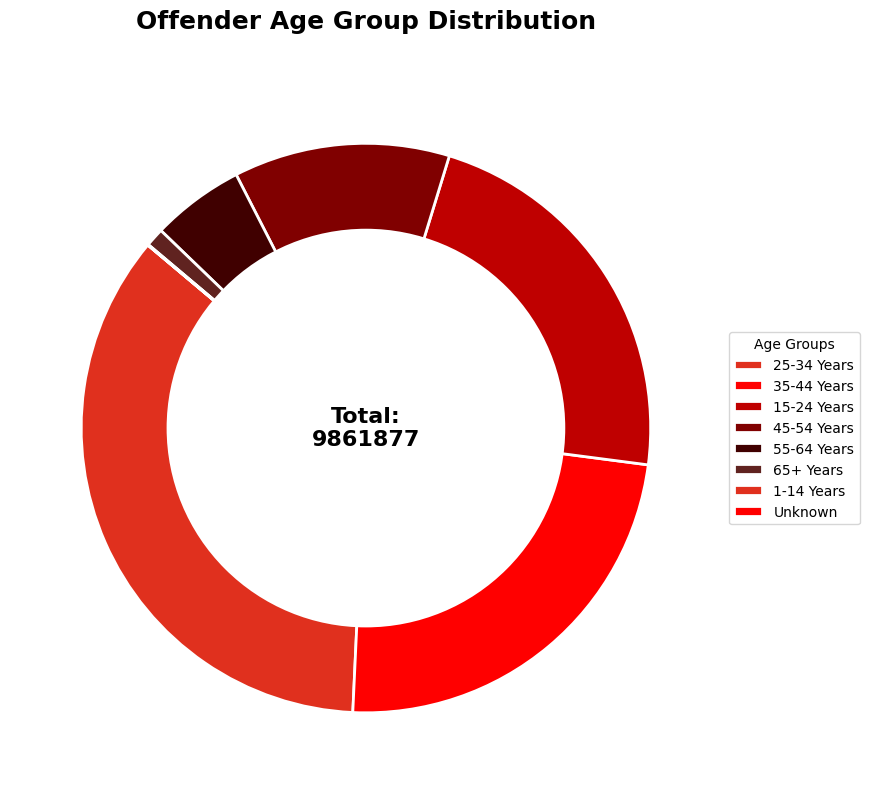

In [ ]:
# Get the counts of each offender age group
age_group_counts = df['OFFENDER_AGE_GROUP'].value_counts()

# custom color palette
custom_colors = ['#e0301e','#ff0000', '#bf0000', '#800000', '#400000', '#602320']

# number of colors matches the number of age groups
if len(age_group_counts) > len(custom_colors):
    custom_colors = (custom_colors * (len(age_group_counts) // len(custom_colors) + 1))[:len(age_group_counts)]

# Create a pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    age_group_counts,
    labels=None,  # We'll use a legend instead
    autopct=lambda pct: f'{pct:.1f}%' if pct > 5 else '',  # Only show percentage for slices > 5%
    startangle=140,
    colors=custom_colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},
    textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'white'}
)

# Add a circle at the center to make it look like a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set title with custom styling
plt.title('Offender Age Group Distribution', fontsize=18, fontweight='bold', y=1.05)

# Add a legend
plt.legend(
    wedges,
    age_group_counts.index,
    title="Age Groups",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Add total count in the center
total = sum(age_group_counts)
plt.text(0, 0, f'Total:\n{total}', ha='center', va='center', fontsize=16, fontweight='bold')

# Adjust layout and display the pie chart
plt.tight_layout()
plt.show()

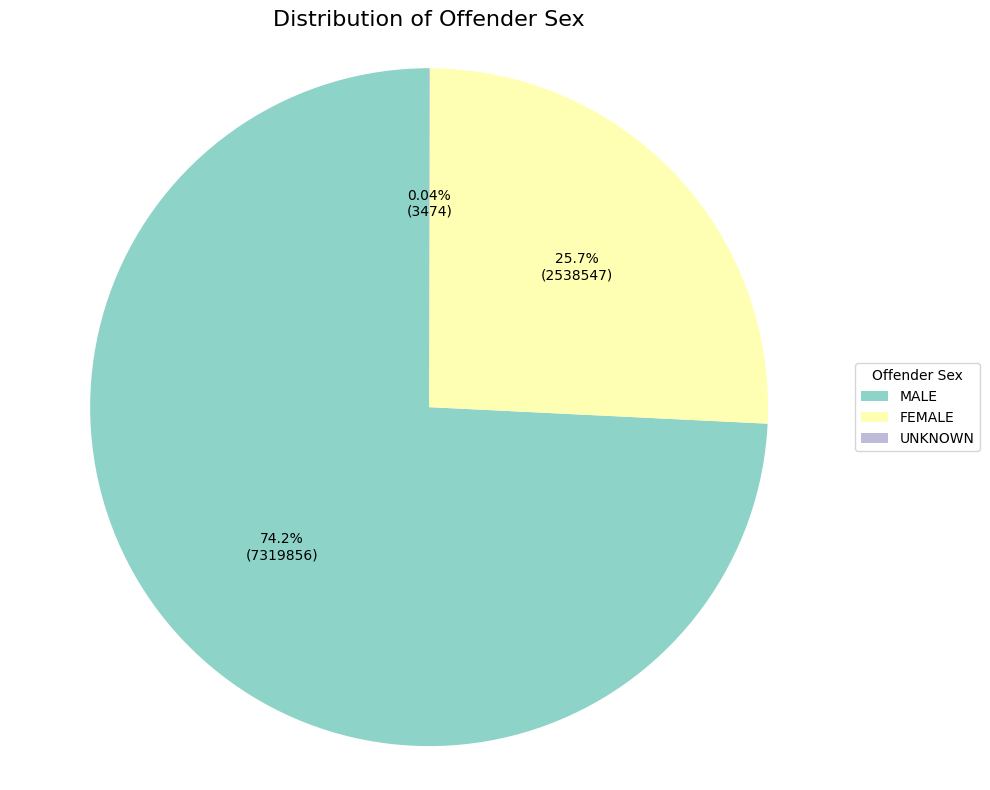

In [ ]:

sex_counts = df['OFFENDER_SEX'].value_counts()
total = sex_counts.sum()
percentages = sex_counts / total * 100

# Create a pie chart
plt.figure(figsize=(10, 8))

# Define the function to format the percentage and show counts
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val:d})' if pct > 1 else f'{pct:.2f}%\n({val:d})'
    return my_autopct

# Plot the pie chart without labels (we'll add them as a legend later)
wedges, texts, autotexts = plt.pie(
    percentages,
    autopct=make_autopct(sex_counts),
    startangle=90,
    colors=plt.cm.Set3.colors
)

# Add a legend on the side for the labels
plt.legend(wedges, sex_counts.index, title="Offender Sex", loc="center left", bbox_to_anchor=(1, 0.5))

# Title of the pie chart
plt.title('Distribution of Offender Sex', fontsize=16)

# Ensure the pie chart is circular
plt.axis('equal')

# Adjust the layout to fit everything cleanly
plt.tight_layout()

# Show the plot
plt.show()

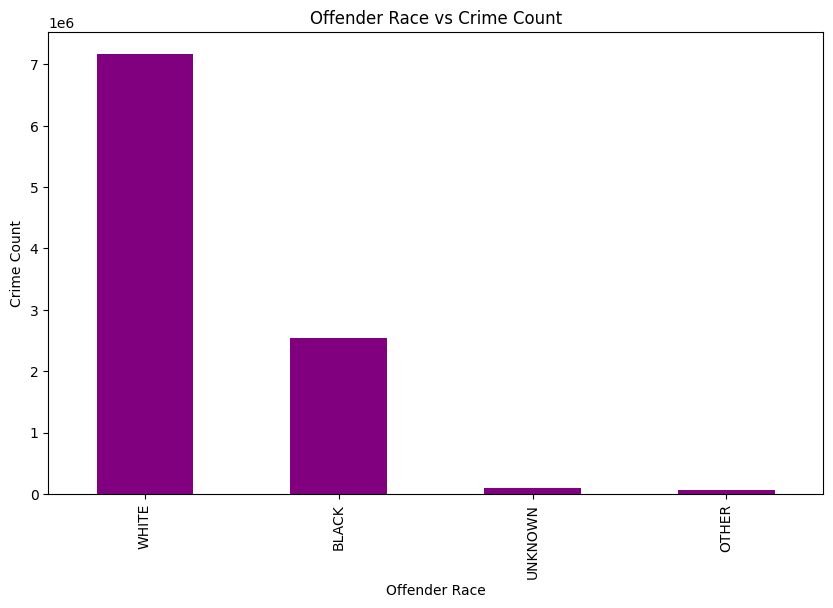

In [ ]:
plt.figure(figsize=(10, 6))
df['OFFENDER_RACE'].value_counts().plot(kind='bar', color='purple')
plt.title('Offender Race vs Crime Count')
plt.xlabel('Offender Race')
plt.ylabel('Crime Count')
plt.show()


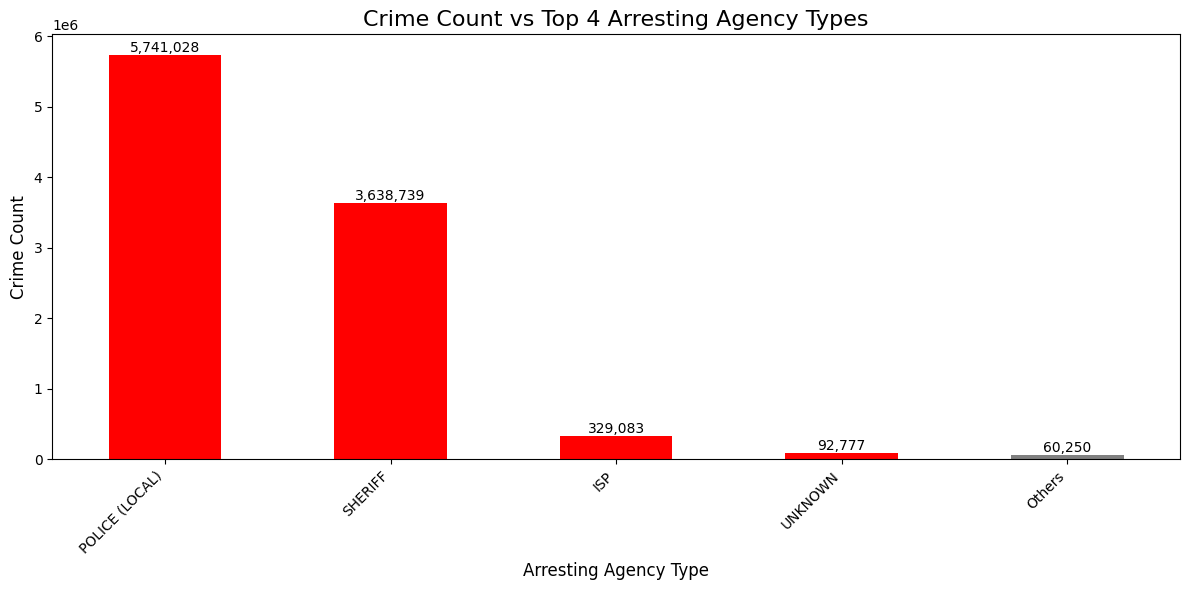

In [ ]:
# value counts
agency_counts = df['ARRESTING_AGENCY_TYPE'].value_counts()

# Separate top 4 and others
top_4 = agency_counts.nlargest(4)
others = pd.Series({'Others': agency_counts.iloc[4:].sum()})

# Combine top 4 and others
plot_data = pd.concat([top_4, others])

# Create the plot
plt.figure(figsize=(12, 6))
ax = plot_data.plot(kind='bar', color=['red']*4 + ['gray'])

# Customize the plot
plt.title('Crime Count vs Top 4 Arresting Agency Types', fontsize=16)
plt.xlabel('Arresting Agency Type', fontsize=12)
plt.ylabel('Crime Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(plot_data):
    ax.text(i, v, f'{v:,}', ha='center', va='bottom')

# Improve the layout
plt.tight_layout()

plt.show()